# Predict US Elections
[Source link](https://thecleverprogrammer.com/2020/10/01/predict-us-elections-with-python/)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

## Loading the dataset

In [2]:
trump_reviews = pd.read_csv("data/Trumpall2.csv")
biden_reviews = pd.read_csv("data/Bidenall2.csv")

print(f"Trump Reviews {trump_reviews.shape}")
print(f"Biden Reviews {biden_reviews.shape}")

Trump Reviews (2788, 2)
Biden Reviews (2540, 2)


In [3]:
print(trump_reviews.head())
print()
print(biden_reviews.head())

              user                                               text
0      manny_rosen   @sanofi please tell us how many shares the Cr...
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
4    James09254677   After 4 years you think you would have figure...

           user                                               text
0   MarkHodder3    @JoeBiden And we’ll find out who won in 2026...
1    K87327961G  @JoeBiden Your Democratic Nazi Party cannot be...
2      OldlaceA                        @JoeBiden So did Lying Barr
3    penblogger  @JoeBiden It's clear you didnt compose this tw...
4  Aquarian0264         @JoeBiden I will vote in person thank you.


## Sentiment Analysis

We use `Textblob` package to perform simple text classification in either positive or negative on the basis of sentiment analysis.  
Polarity ranges from -1 to +1(negative to positive) and tells whether the text has negative sentiments or positive sentiments.  
Polarity tells about factual information.

For example:

In [4]:
textblob1 = TextBlob(trump_reviews["text"][10])
print("Trump :",textblob1.sentiment)
textblob2 = TextBlob(biden_reviews["text"][500])
print("Biden :",textblob2.sentiment)

Trump : Sentiment(polarity=0.15, subjectivity=0.3125)
Biden : Sentiment(polarity=0.6, subjectivity=0.9)


### Adding **sentiment polarity** column to datasets

In [5]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

trump_reviews["Sentiment Polarity"] = trump_reviews["text"].apply(find_pol)
biden_reviews["Sentiment Polarity"] = biden_reviews["text"].apply(find_pol)

print(trump_reviews["Sentiment Polarity"].head())
print()
print(biden_reviews["Sentiment Polarity"].head())

0    0.05
1    0.00
2   -0.50
3    0.50
4    0.00
Name: Sentiment Polarity, dtype: float64

0    0.00
1    0.00
2    0.00
3    0.05
4    0.00
Name: Sentiment Polarity, dtype: float64


## Sentiment Polarity on Both the candidates

In [6]:
trump_reviews["Expression Label"] = np.where(trump_reviews["Sentiment Polarity"] > 0, "Positive", "Negative")
trump_reviews.loc[trump_reviews["Sentiment Polarity"] == 0, "Expression Label"] = "Neural"
print(trump_reviews[["Sentiment Polarity", "Expression Label"]].head())

print()

biden_reviews["Expression Label"] = np.where(biden_reviews["Sentiment Polarity"] > 0, "Positive", "Negative")
biden_reviews.loc[biden_reviews["Sentiment Polarity"] == 0, "Expression Label"] = "Neural"
print(biden_reviews[["Sentiment Polarity", "Expression Label"]].head())

   Sentiment Polarity Expression Label
0                0.05         Positive
1                0.00           Neural
2               -0.50         Negative
3                0.50         Positive
4                0.00           Neural

   Sentiment Polarity Expression Label
0                0.00           Neural
1                0.00           Neural
2                0.00           Neural
3                0.05         Positive
4                0.00           Neural


## Analyzing the date before cleaning

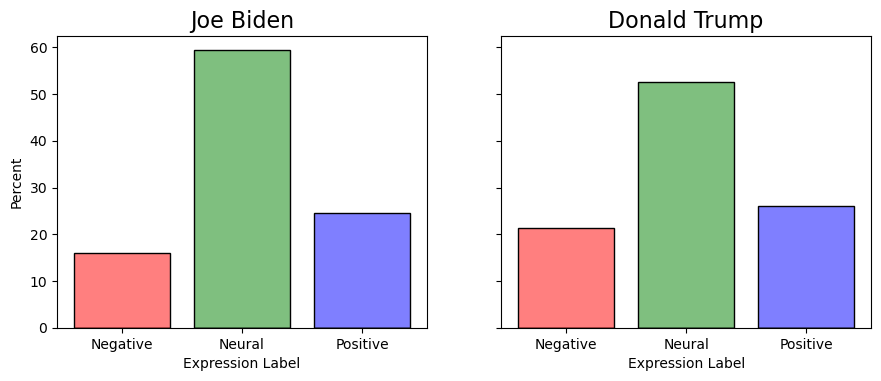

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

sns.histplot(
    biden_reviews.sort_values(by=["Expression Label"]),
    x="Expression Label",
    hue="Expression Label",
    palette=["red", "green", "blue"],
    stat="percent",
    legend=False,
    shrink=0.8,
    ax=axes[0],
).set_title("Joe Biden", fontsize=16)

sns.histplot(
    trump_reviews.sort_values(by=["Expression Label"]),
    x="Expression Label",
    hue="Expression Label",
    palette=["red", "green", "blue"],
    stat="percent",
    legend=False,
    shrink=0.8,
    ax=axes[1],
).set_title("Donald Trump", fontsize=16)

fig.tight_layout(pad=5.0);

## Cleaning the datasets

In [8]:
reviews1 = trump_reviews[trump_reviews['Sentiment Polarity'] == 0.0000]
print(reviews1.shape)

cond1=trump_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump_reviews.drop(trump_reviews[cond1].index, inplace = True)
print(trump_reviews.shape)

reviews2 = biden_reviews[biden_reviews['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2=biden_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden_reviews.drop(biden_reviews[cond2].index, inplace = True)
print(biden_reviews.shape)

(1464, 4)
(1324, 4)
(1509, 4)
(1031, 4)


In [9]:
# Donald Trump
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(trump_reviews.index, remove_n, replace=False)
df_subset_trump = trump_reviews.drop(drop_indices)
print(df_subset_trump.shape)
# Joe Biden
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(biden_reviews.index, remove_n, replace=False)
df_subset_biden = biden_reviews.drop(drop_indices)
print(df_subset_biden.shape)

(1000, 4)
(1000, 4)


## Analyzing the date after cleaning

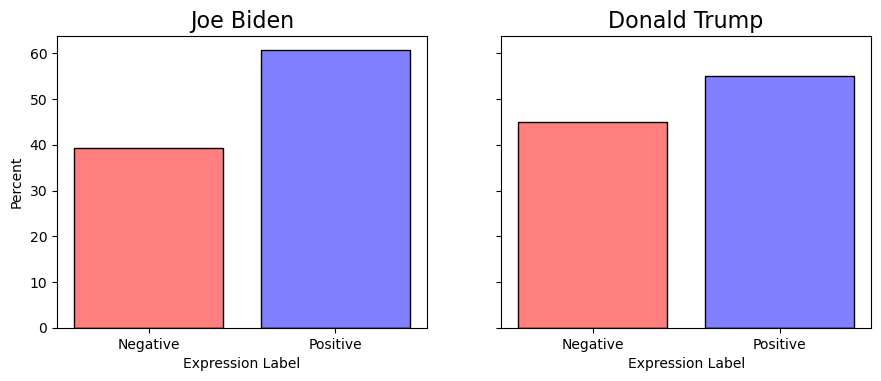

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

sns.histplot(
    df_subset_biden.sort_values(by=["Expression Label"]),
    x="Expression Label",
    hue="Expression Label",
    palette=["red", "blue"],
    stat="percent",
    legend=False,
    shrink=0.8,
    ax=axes[0],
).set_title("Joe Biden", fontsize=16)

sns.histplot(
    df_subset_trump.sort_values(by=["Expression Label"]),
    x="Expression Label",
    hue="Expression Label",
    palette=["red", "blue"],
    stat="percent",
    legend=False,
    shrink=0.8,
    ax=axes[1],
).set_title("Donald Trump", fontsize=16)

fig.tight_layout(pad=5.0);

**Result:** From the above figure, it is very clear that Joe Biden is getting more Positive tweets and less negative tweets as compared to Donald Trump. So it will not be wrong to conclude that Joe Bined is more prefered by the people to win the US Presidential Elections than Donald Trump.